<h1 align="center">SALES PREDICTION MODEL</h1>

Dataset: <a href="https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data/data">Click here for dataset</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("sales.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

### Data Cleaning

In [9]:
category_cols = df[['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [10]:
# Unique values in each categorical column 

for i in category_cols.columns:
    print('Unique values in',i, 'are :')
    print(category_cols[i].value_counts())
    print('-'*50)

Unique values in Item_Fat_Content are :
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
--------------------------------------------------
Unique values in Item_Type are :
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
--------------------------------------------------
Unique values in Outlet_Size are :
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
--------------------------------------------------
Unique values in 

In [11]:
df1 = df.copy()

In [12]:
df1['Item_Fat_Content'].replace({'LF':'Low Fat',
                                 'reg':'Regular',
                                 'low fat':'Low Fat'},inplace=True)

In [13]:
df1['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### Numeric Data Distribution

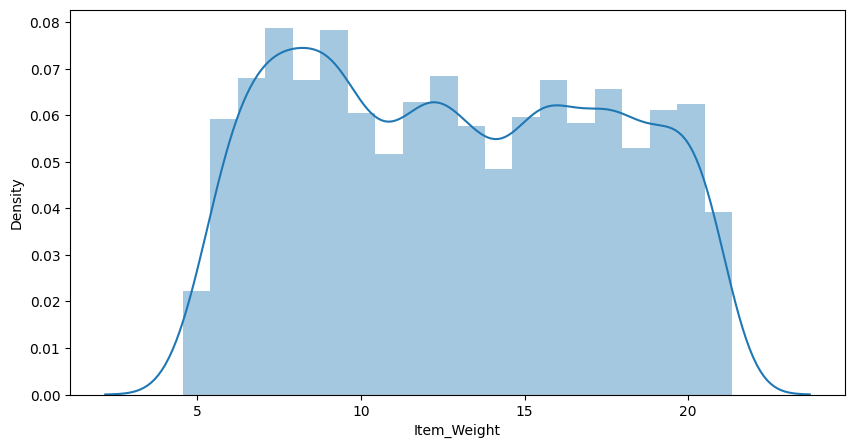

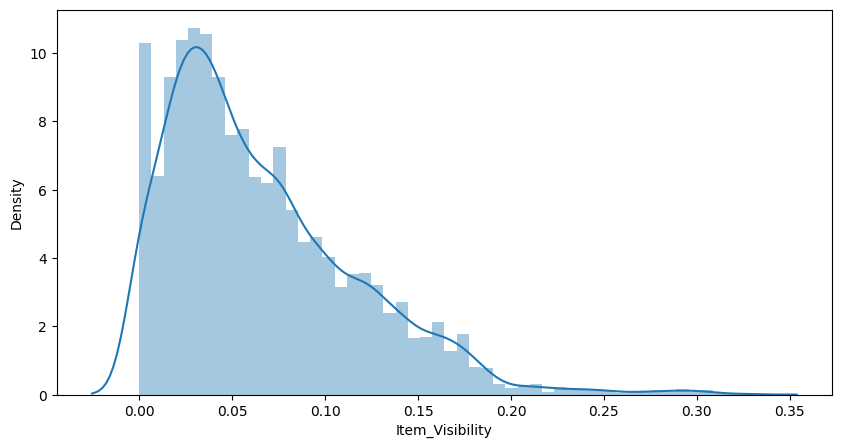

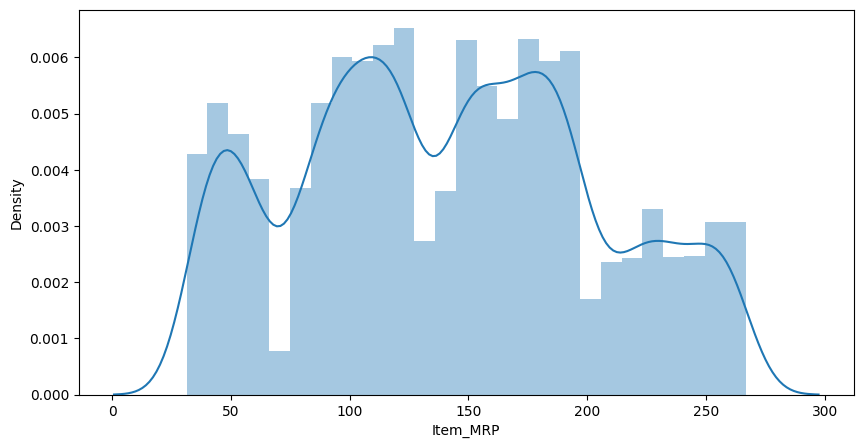

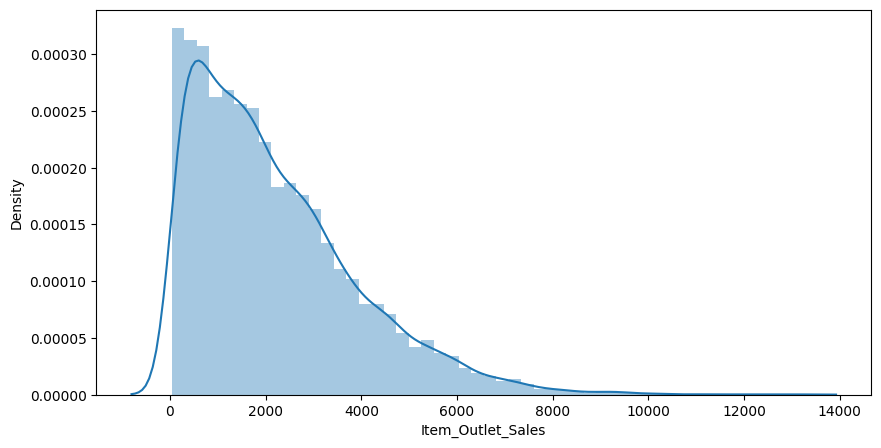

In [14]:
#Plot distplot for numerical columns
cols = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.distplot(df1[col])
    plt.show()

## MODEL BUILDING

### Split the Data

In [15]:
X = df1.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis='columns')
y = df1['Item_Outlet_Sales']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Creating Preprocessing Pipeline

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import Pipeline

weight_pipe = Pipeline(steps=[('weight_imputation',KNNImputer(weights='distance')),
                           ('weight_boxcox',PowerTransformer(method='yeo-johnson'))])

size_pipe = Pipeline(steps=[('size_imputation',SimpleImputer(strategy='most_frequent')),
                           ('size_encode',OrdinalEncoder(categories=[["Small","Medium","High"]],dtype=np.int32))])

In [18]:
col_transform = ColumnTransformer(transformers=[
    ('item_weight',weight_pipe,[0]),
    ('outlet_size',size_pipe,[5]),
    ('ode',OrdinalEncoder(categories=[["Tier 3","Tier 2","Tier 1"]],dtype=np.int32),[6]),
    ('ohe',OneHotEncoder(sparse_output=False,dtype=np.int32),[1,3,7]),
    ('box_cox',PowerTransformer(method='yeo-johnson'),[2,4])],
    remainder='passthrough')

In [19]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [20]:
col_transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('item_weight',
                                 Pipeline(steps=[('weight_imputation',
                                                  KNNImputer(weights='distance')),
                                                 ('weight_boxcox',
                                                  PowerTransformer())]),
                                 [0]),
                                ('outlet_size',
                                 Pipeline(steps=[('size_imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('size_encode',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']],
                                                                 dtype=<class 'numpy.int32'>))]),
                                 [5]),
                                ('ode',
                                 OrdinalEncoder(categories=[['Tier 3', 'Tier 2',
                                                             'Tier 1']],
                                                dtype=<class 'numpy.int32'>),
                                 [6]),
                                ('ohe',
                                 OneHotEncoder(dtype=<class 'numpy.int32'>,
                                               sparse_output=False),
                                 [1, 3, 7]),
                                ('box_cox', PowerTransformer(), [2, 4])])

In [21]:
X_train_tnf = col_transform.fit_transform(X_train)
X_test_tnf = col_transform.transform(X_test)

### Modeling

In [22]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [23]:
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(random_state=42,alpha=0.1)),
    ('Lasso Regression', Lasso(random_state=42,alpha=0.1)),
    ('Support Vector Regression', SVR(kernel='rbf',C=500)),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42,max_depth=6)),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42,max_depth=6)),
    ('ADABoost Regressor', AdaBoostRegressor(n_estimators=7,random_state=42)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42,max_depth=4))]

In [24]:
for clf_name, clf in regressors:
    clf.fit(X_train_tnf, y_train)
    y_pred = clf.predict(X_test_tnf)
    print(f'{clf_name}:')
    print('R2 Score on Training Data: ',clf.score(X_train_tnf,y_train))
    print('Mean Cross-Val Score: ',np.mean(cross_val_score(clf,X_train_tnf,y_train,cv=5)))
    print('R2 Score on Testing Data: ',clf.score(X_test_tnf,y_test))
    print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
    print('-'*60)

Linear Regression:
R2 Score on Training Data:  0.5500492641497423
Mean Cross-Val Score:  0.5393357648920359
R2 Score on Testing Data:  0.5642770894667566
RMSE:  1088.247135612344
------------------------------------------------------------
Ridge Regression:
R2 Score on Training Data:  0.5575225838907316
Mean Cross-Val Score:  0.552922508006173
R2 Score on Testing Data:  0.575411979431534
RMSE:  1074.2520796112688
------------------------------------------------------------
Lasso Regression:
R2 Score on Training Data:  0.5575206387361599
Mean Cross-Val Score:  0.5530322984552868
R2 Score on Testing Data:  0.5755033904183557
RMSE:  1074.13643370998
------------------------------------------------------------
Support Vector Regression:
R2 Score on Training Data:  0.6107104112854362
Mean Cross-Val Score:  0.5827870253497632
R2 Score on Testing Data:  0.6103449289636014
RMSE:  1029.1116651667808
------------------------------------------------------------
Decision Tree Regressor:
R2 Score o